<a href="https://colab.research.google.com/github/KyeraFrancis/hack_a_dog/blob/main/Hack_a_dog_baseline_key.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline HotDog Predictor model

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [41]:
!ls /content/drive/MyDrive/hotdog-nothotdog/

test  train


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the images from the mounted drive and creating test and train folders
Inspired by: [LucasEW](https://github.com/christianversloot/machine-learning-articles/blob/main/tutorial-building-a-hot-dog-not-hot-dog-classifier-with-tensorflow-and-keras.md)

In [43]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = plt.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

In [49]:
# Paths
test_hotdog_path = '/content/drive/MyDrive/hotdog-nothotdog/test/hotdog'
test_not_path = '/content/drive/MyDrive/hotdog-nothotdog/test/nothotdog'
train_hotdog_path = '/content/drive/MyDrive/hotdog-nothotdog/train/hotdog'
train_not_path = '/content/drive/MyDrive/hotdog-nothotdog/train/nothotdog'

# Load images
train_hotdog_images = load_images_from_folder(train_hotdog_path)
train_not_images = load_images_from_folder(train_not_path)
test_hotdog_images = load_images_from_folder(test_hotdog_path)
test_not_images = load_images_from_folder(test_not_path)

# Assign labels: 1 for 'hotdog', 0 for 'nothotdog'
train_labels = [1] * len(train_hotdog_images) + [0] * len(train_not_images)
test_labels = [1] * len(test_hotdog_images) + [0] * len(test_not_images)

# Combine images
train_images = train_hotdog_images + train_not_images
test_images = test_hotdog_images + test_not_images

print("Number of test images (hotdog):", len(test_hotdog_images))
print("Number of test images (nothotdog):", len(test_not_images))
print("Number of train images (hotdog):", len(train_hotdog_images))
print("Number of train images (nothotdog):", len(train_not_images))

Number of test images (hotdog): 322
Number of test images (nothotdog): 322
Number of train images (hotdog): 627
Number of train images (nothotdog): 1477


In [52]:
# Pair each image with its label
train_data = list(zip(train_images, train_labels))
test_data = list(zip(test_images, test_labels))

print("Number of test images (hotdog):", len(test_hotdog_images))
print("Number of test images (nothotdog):", len(test_not_images))

Number of test images (hotdog): 322
Number of test images (nothotdog): 322


Numpy Array Transformation

In [60]:
# train test split
X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [56]:
|# Iterate over files in the folder
for filename in os.listdir(train):
    if filename.endswith(".jpg"):
        img_path = os.path.join(train, filename)
        with Image.open(img_path) as img:
            #Show image
            img.show()

## Image Exploration

In [62]:
X_train[25]

array([[[ 11,  11,  13],
        [ 12,  12,  14],
        [ 14,  14,  16],
        ...,
        [  6,   7,   9],
        [  6,   7,   9],
        [  3,   4,   6]],

       [[ 12,  12,  14],
        [ 11,  11,  13],
        [ 10,  10,  12],
        ...,
        [  5,   6,   8],
        [  6,   7,   9],
        [  6,   7,   9]],

       [[ 12,  12,  14],
        [  8,   8,  10],
        [ 11,  11,  13],
        ...,
        [  7,   7,   7],
        [  9,   9,   9],
        [  8,   8,   8]],

       ...,

       [[170, 165, 161],
        [170, 165, 161],
        [171, 167, 164],
        ...,
        [165, 158, 152],
        [164, 157, 151],
        [162, 157, 151]],

       [[169, 164, 160],
        [170, 165, 161],
        [172, 168, 165],
        ...,
        [164, 157, 151],
        [163, 156, 150],
        [160, 155, 151]],

       [[169, 164, 160],
        [170, 165, 161],
        [172, 169, 164],
        ...,
        [161, 156, 152],
        [160, 155, 151],
        [158, 153, 150]]

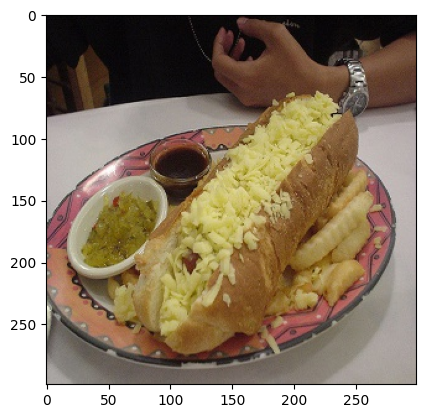

In [64]:
plt.imshow(X_train[25], cmap='binary');

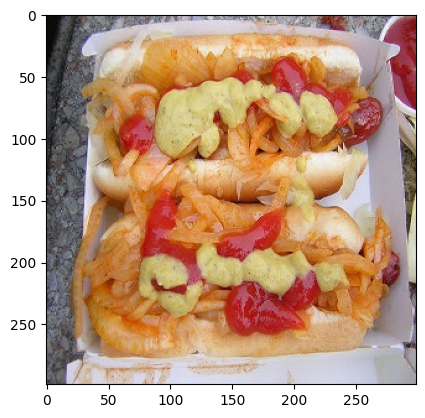

In [65]:
plt.imshow(X_test[0], cmap='binary');

## Model Preparation